In [1]:
%run time_frequency_features.py
bscs = cfh.reshape_bsc(joblib.load('../semisupervised/logBSC_H200_stimuli.pkl'))

Bad val 'white' on line #20
	"grid.linewidth: white
"
	in file "/home/mboos/.config/matplotlib/stylelib/mb.mplstyle"
	Key grid.linewidth: Could not convert "white" to float
/home/mboos/anaconda3/envs/mne/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mboos/anaconda3/envs/mne/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
mean_mps_stft = [mps_stft[cluster_idx==i].mean(axis=0) for i in range(5)]

In [3]:
rec_speech = {key: np.reshape(
    np.concatenate([np.reshape(bsc.dot(np.reshape(Ws, (200, -1))), (10, 48)) for bsc in np.reshape(val, (-1, 200))], axis=0),
    (-1, 60*10, 48))
              for key, val in speech_dict.items()}
rec_speech_cluster ={cluster: {key: np.reshape(
    np.concatenate([np.reshape(bsc[...,cluster_idx==cluster].dot(np.reshape(Ws, (200, -1))[cluster_idx==cluster]), (10, 48)) for bsc in np.reshape(val, (-1, 200))], axis=0),
    (-1, 60*10, 48))
              for key, val in speech_dict.items()}
                    for cluster in range(5)}

NameError: name 'speech_dict' is not defined

In [3]:
rec_speech_full = np.reshape(np.concatenate([np.reshape(bsc.dot(np.reshape(Ws, (200, -1))), (10, 48)) for bsc in np.reshape(bscs[:,20:40], (-1, 200))], axis=0),
    (-1, 48))
rec_speech_cluster_full ={cluster: np.reshape(
    np.concatenate([np.reshape(bsc[..., cluster_idx==cluster].dot(np.reshape(Ws, (200, -1))[cluster_idx==cluster]), (10, 48)) for bsc in np.reshape(bscs[:,20:40], (-1, 200))], axis=0),
    (-1, 48)) for cluster in range(5)}

In [6]:
from skimage.util import view_as_windows

In [14]:
mps_rec_full = np.vstack([aud.compute_MPS_from_STFT(np.squeeze(specgram))[None]
                   for specgram in view_as_windows(rec_speech_full, (200,48), step=200)])

mps_rec_cluster_full = {cluster: np.vstack([aud.compute_MPS_from_STFT(np.squeeze(specgram))[None]
                   for specgram in view_as_windows(data, (200,48), step=200)])
                        for cluster, data in rec_speech_cluster_full.items()}

In [59]:
rec_speech_stft = [aud.compute_MPS_from_STFT(rec_speech['Speech SNR 10 db'][i][:200])
                   for i in range(50)]
rec_speech_cluster2 = [[aud.compute_MPS_from_STFT(rec_speech_cluster[clstr]['Speech SNR -5 db'][i][:200])
                   for i in range(50)] for clstr in range(5)]
#rec_speech_normalized = [(test-test.min()) / (test.max()-test.min())
#                         for test in rec_speech_stft]
mps_rec_speech = np.vstack([test[None] for test in rec_speech_stft])
mps_rec_speech[:,100,0] = 0.
mps_rec_speech_cluster = np.vstack([np.vstack([test[None] for test in rec_speech_cluster2[cluster]])[None] for cluster in range(5)]
                                  )
mps_rec_speech_cluster[:,:,100,0] = 0.

In [4]:
cluster_stim_df = pd.DataFrame(average_cluster)
cluster_stim_df['Type'] = np.repeat(average_dict.keys(), [average_dict[key][0].shape[0] for key in average_dict])

In [6]:
cluster_melted = pd.melt(cluster_stim_df, id_vars='Type', var_name='Cluster', value_name='Activation')

In [6]:
%load_ext rpy2.ipython

In [16]:
%%R -i cluster_stim_df
install.packages("brms")
library(brms)
cluster_stim_df$Type = factor(cluster_stim_df$Type, ordered=TRUE, levels=c('Speech SNR -5 db', 'Speech SNR 0 db', 'Speech SNR 10 db', 'Speech SNR 20 db'))
fit1 <- brm(Type ~ Cluster.1 + Cluster.2 + Cluster.3 + Cluster.4 + Cluster.5, 
            data = cluster_stim_df, family = cumulative())
WAIC_complex <- WAIC(fit1)
fit2 <- brm(Type ~ Cluster.5, 
            data = cluster_stim_df, family = cumulative())
WAIC_cluster5 <- WAIC(fit2)
compare_ic(WAIC_complex, WAIC_simple)
#plot(fit1, pars=c('Cluster.1', 'Cluster.2', 'Cluster.3', 'Cluster.4', 'Cluster.'))

/home/mboos/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  length 3818402 bytes (3,6 MB)

  warnings.warn(x, RRuntimeWarning)
/home/mboos/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: downloaded 3,6 MB


  warnings.warn(x, RRuntimeWarning)
/home/mboos/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: recompiling to avoid crashing R session

  warnings.warn(x, RRuntimeWarning)



SAMPLING FOR MODEL 'a521321bc853dbf937f110911292cc8e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000143 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 9.21471 seconds (Warm-up)
Chain 1:                2.73213 seconds (Sampling)
C

In [18]:
%%R
fit_cluster1 <- brm(Type ~ Cluster.1, 
            data = cluster_stim_df, family = cumulative())
WAIC_cluster1 <- WAIC(fit_cluster1)
fit_cluster2 <- brm(Type ~ Cluster.2, 
            data = cluster_stim_df, family = cumulative())
WAIC_cluster2 <- WAIC(fit_cluster2)
fit_cluster3 <- brm(Type ~ Cluster.3, 
            data = cluster_stim_df, family = cumulative())
WAIC_cluster3 <- WAIC(fit_cluster3)
fit_cluster4 <- brm(Type ~ Cluster.4, 
            data = cluster_stim_df, family = cumulative())
WAIC_cluster4 <- WAIC(fit_cluster4)


SAMPLING FOR MODEL 'a521321bc853dbf937f110911292cc8e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000143 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 2.45187 seconds (Warm-up)
Chain 1:                1.06868 seconds (Sampling)
C

In [13]:
import librosa as lbr
fft_freq = lbr.core.fft_frequencies(sr=44100, n_fft=882)
stepfreq = np.log(fft_freq)
stepfreq = stepfreq[1] - stepfreq[0]

/home/mboos/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
times, freqs = aud.compute_mps_time_and_freq_labels()
best_time_stft, best_freq_stft = zip(*[np.unravel_index(np.argmax(mps_stft[:,5:][i]), (5, 81)) for i in range(200)])
best_time_stft = np.array(best_time_stft)
best_freq_stft = np.array(best_freq_stft)
best_freq_stft = freqs[best_freq_stft]
best_time_stft = times[5:][best_time_stft]

In [5]:
mps_ft_df = pd.DataFrame(feature_dict)
mps_ft_df['Cluster'] = cluster_idx+1
mps_ft_df = pd.melt(mps_ft_df, var_name='Feature', id_vars='Cluster')

In [6]:
bscs = joblib.load('../semisupervised/logBSC_H200_stimuli.pkl')
bscs = cfh.reshape_bsc(bscs)
cluster_means = {i: bscs.mean(axis=1)[..., cluster_idx==i].mean(axis=-1) for i in np.unique(cluster_idx)}
cluster_means = np.vstack([cluster_means[i] for i in np.unique(cluster_idx)])

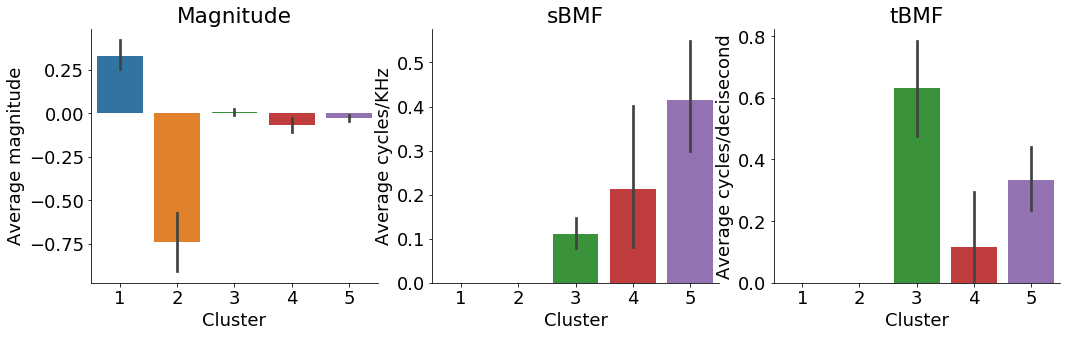

In [15]:
plt.rcParams.update({'font.size': 18})
g = sns.catplot(col='Feature', data=mps_ft_df, sharey=False, y='value', x='Cluster', kind='bar', n_boot=5000, capsize=None, col_order=['magnitude', 'sBMF', 'tBMF'])
g.axes[0][0].set_ylabel('Average magnitude')
g.axes[0][1].set_ylabel('Average cycles/KHz')
g.axes[0][2].set_ylabel('Average cycles/decisecond')
g.axes[0][0].set_title('Magnitude')
g.axes[0][1].set_title('sBMF')
g.axes[0][2].set_title('tBMF')
plt.savefig('Features_per_cluster_neu.pdf')

In [28]:
speech_corrs = [np.corrcoef(speech_overlap, cluster_mean)[0,1] for cluster_mean in cluster_means]

In [84]:
bla=pd.DataFrame({'Cluster': np.arange(1,6), 'Correlation with speech duration': speech_corrs})

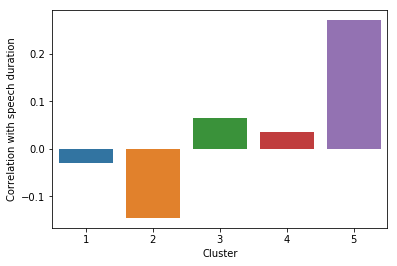

In [87]:
sns.barplot(x='Cluster', data=bla, y='Correlation with speech duration')
plt.savefig('Correlation_with_speech_per_cluster.svg')